<a href="https://colab.research.google.com/github/Petrenko-Anton/Data-Science-GoIT/blob/main/HW_10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras import optimizers

In [5]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [84]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [36]:
# Структура дещо модифікована під наші умови - мале зображення 28х28, чорнобіле, останні 3 згортки 512 убрані, бо розмірність вже досягла 1 пикселя
def VGG_16():
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation="relu"))

    model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))

    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2)))


    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))

    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))

    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2)))


    model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))

    model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))

    model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2)))


    model.add(Flatten())

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))

    return model

In [37]:
model = VGG_16()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_5 (ZeroPadd  (None, 30, 30, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_51 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 128)      

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=1,
    mode="max",
    baseline=0.925,
    restore_best_weights=True,
    start_from_epoch=5,
    verbose=1
)

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=["accuracy"])

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

history = model.fit(train_images, train_labels, callbacks=[early_stopping], epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20
469/469 [==============================] - 23s 42ms/step - loss: 0.6421 - accuracy: 0.7582 - val_loss: 0.3868 - val_accuracy: 0.8524
Epoch 2/20
469/469 [==============================] - 20s 42ms/step - loss: 0.3177 - accuracy: 0.8878 - val_loss: 0.3110 - val_accuracy: 0.8905
Epoch 3/20
469/469 [==============================] - 20s 42ms/step - loss: 0.2630 - accuracy: 0.9065 - val_loss: 0.2650 - val_accuracy: 0.9011
Epoch 4/20
469/469 [==============================] - 20s 43ms/step - loss: 0.2275 - accuracy: 0.9188 - val_loss: 0.2534 - val_accuracy: 0.9155
Epoch 5/20
469/469 [==============================] - 20s 42ms/step - loss: 0.2033 - accuracy: 0.9284 - val_loss: 0.2362 - val_accuracy: 0.9163
Epoch 6/20
469/469 [==============================] - 20s 42ms/step - loss: 0.1876 - accuracy: 0.9334 - val_loss: 0.2393 - val_accuracy: 0.9153
Epoch 7/20
469/469 [==============================] - 19s 42ms/step - loss: 0.1711 - accuracy: 0.9397 - val_loss: 0.2235 - val_accuracy:

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nТочність на тестовому наборі даних: {test_acc * 100:.2f}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.3712 - accuracy: 0.9222

Точність на тестовому наборі даних: 92.22%


In [21]:
test_labels = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 17ms/step


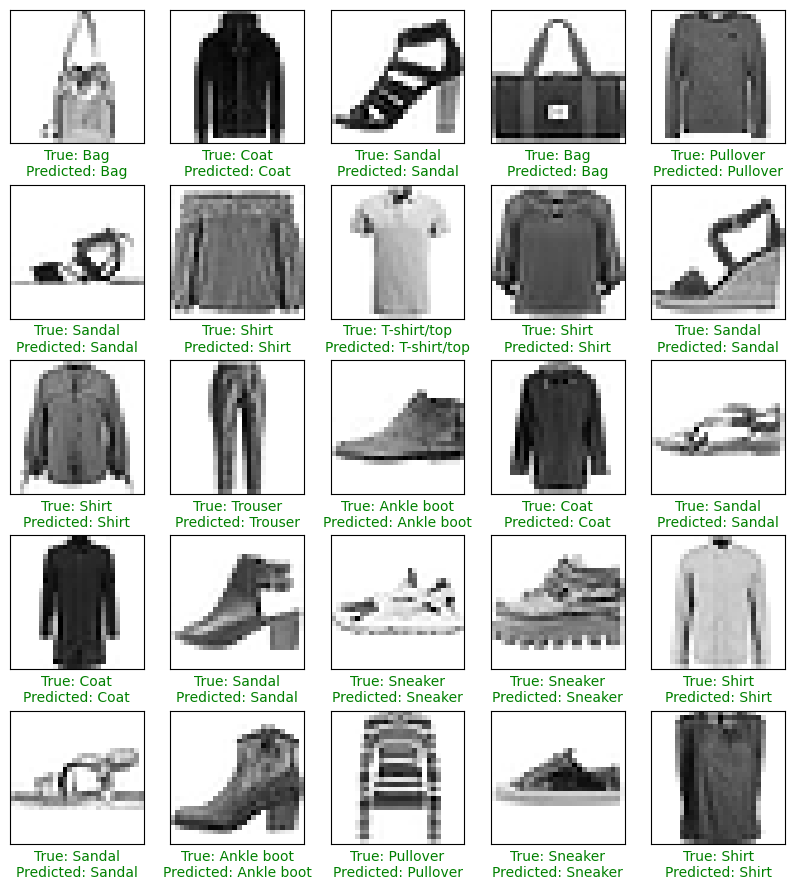

In [23]:
# Візуалізація передбачень моделі

plt.figure(figsize=(10, 11))
random_indices = np.random.choice(10000, size=25, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Передбачення за допомогою натренованої моделі
    prediction = model.predict(np.expand_dims(test_images[idx], axis=0))[0]
    predicted_label = class_names[np.argmax(prediction)]
    true_label = class_names[test_labels[idx]]
    (label_color, cmap) = ("green", "binary") if true_label == predicted_label else ("red", "gray")
    plt.imshow(test_images[idx], cmap=cmap)
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}", color=label_color)
plt.show()

Таким чином, використання VGG16 дало змогу збільшити точність з 91,88% в попередньому ноутбуці до 92,22% (всього на 0,34%)


In [6]:
# спробуємо вбудовану в Keras VGG16 попередньо навчену на imagenet
from keras.applications import VGG16
conv_base = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(32, 32, 3)))
conv_base.trainable = False

def VGG_16_Keras():

    model = Sequential()
    model.add(conv_base)
    model.add(Flatten())

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))

    return model


In [7]:
def prepare(images):
    images = np.stack((images,) * 3, axis=-1)
    images = images.astype("float32") / 255.0
    images = tf.image.resize(images, (32, 32))
    return images

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = prepare(train_images)
test_images = prepare(test_images)

In [8]:
model_1 = VGG_16_Keras()
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model_1.build(input_shape=(32,32,3))
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [93]:
history = model_1.fit(train_images, train_labels, callbacks=[early_stopping], epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20
469/469 [==============================] - 11s 20ms/step - loss: 0.9605 - accuracy: 0.6729 - val_loss: 0.5772 - val_accuracy: 0.7960
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.5664 - accuracy: 0.7975 - val_loss: 0.4954 - val_accuracy: 0.8215
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.4992 - accuracy: 0.8201 - val_loss: 0.4550 - val_accuracy: 0.8348
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.4625 - accuracy: 0.8324 - val_loss: 0.4367 - val_accuracy: 0.8414
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.4351 - accuracy: 0.8408 - val_loss: 0.4168 - val_accuracy: 0.8494
Epoch 6/20
469/469 [==============================] - 10s 20ms/step - loss: 0.4158 - accuracy: 0.8476 - val_loss: 0.4064 - val_accuracy: 0.8512
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.4005 - accuracy: 0.8548 - val_loss: 0.3959 - val_accuracy: 0.8

точність не достатня - 86,09%. Спробуємо провести донавчання

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [10]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [12]:
model_2 = VGG_16_Keras()
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model_2.build(input_shape=(32,32,3))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [13]:
history = model_2.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20
469/469 [==============================] - 22s 34ms/step - loss: 0.4649 - accuracy: 0.8357 - val_loss: 0.3352 - val_accuracy: 0.8810
Epoch 2/20
469/469 [==============================] - 14s 29ms/step - loss: 0.3024 - accuracy: 0.8907 - val_loss: 0.2988 - val_accuracy: 0.8923
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2629 - accuracy: 0.9052 - val_loss: 0.2969 - val_accuracy: 0.8953
Epoch 4/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2349 - accuracy: 0.9140 - val_loss: 0.2885 - val_accuracy: 0.9006
Epoch 5/20
469/469 [==============================] - 14s 29ms/step - loss: 0.2160 - accuracy: 0.9203 - val_loss: 0.2790 - val_accuracy: 0.9015
Epoch 6/20
469/469 [==============================] - 14s 29ms/step - loss: 0.2020 - accuracy: 0.9257 - val_loss: 0.2723 - val_accuracy: 0.9031
Epoch 7/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1803 - accuracy: 0.9330 - val_loss: 0.2626 - val_accuracy:

Є відчуття що преднавчена на кольорових зображеннях більшого розміру мережа VGG16 не зовсім пыдходить для нашого датасету Fashion_mnist. ТОчність після донавчання 3-х останніх шарів склала 90,8% проти навченої повністю мережи - 92,22%